# **Ensemble osztályozás (Bagging, Boosting)**
Készítette: *Fogarassyné Vathy Ágnes*

## **1. Titanic adathalmaz bemutatása és általános előkészítése**

Az adathalmaz 888 darab személy adatait tartalmazza, akik a Titanic-on tartózkodtak, amikor a katasztrófa bekövetkezett.

Oszlopok nevei és típusai:
1. Survived: 0 vagy 1-es értéket vesz fel, az alapján hogy az adott személy túlélte-e a katasztrófát vagy sem --> int64
2. Pclass: 1, 2 vagy 3-as értéket vehet fel, az alapján, hogy az adott személy milyen osztályon utazott --> int64
3. Name: az adott illető nevét tartalmazza --> object (string)
4. Sex: male, vagy female-t vesz fel. Személy neme --> object (string)
5. Age: személy életkora --> float64
6. Siblings/Spouses Aboard: megmutatja, hogy az adott illetőnek mennyi testvére van a fedélzeten, vagy házastárssal utazik-e --> int64
7. Parents/Children Aboard: megmutatja, hogy az adott személynek a szülei/gyermekei közül mennyien tartózkodnak a fedélzeten -->i nt64
8. Fare: mennyit fizetett a jegyért --> float64

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Block 1.1** Az adatok beolvasása és előkészítése:

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# DataFrame létrehozása Excel fájlból
titanic = pd.read_excel('Titanic.xlsx')

# Name oszlop eldobása
titanic.drop(labels='Name', axis=1, inplace=True)

# A Sex oszlop dummy váltóvá konvertálása  (referencia kódolással)
titanic['Sex'] = pd.get_dummies(titanic['Sex'], drop_first=True)

# DataFrame-et TULAJDONSÁGOK(features, X) és CÉL(target, y) tömbökre bontjuk
X = titanic.iloc[:, 1:].values
y = titanic.iloc[:, 0].values.reshape(-1,1)

# Tréning és teszt adatok létrehozása 2/3 és 1/3 vágással
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

## **2. Bagging**

### **2.1 Random Forest**

Random Forest osztályozót a **[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)** osztály segítségével valósíthatjuk meg.

*Fontosabb paraméterek:*

- *n_estimators*: az erdő mérete (deafult értéke 100)
- *max_depth*: fák maximális mélysége
- *criterion*: hogyan válassza ki az attribútumokat
    * 'gini': Gini index
    * 'entropy': információnyereség elve
- *min_samples_leaf*: a csúcs szétbontásához minimálisan szükséges mintaszám

**Block 2.1** Random Forest osztályozó létrehozása, a modell illesztése default paraméterekkel és az osztályozó kiértékelése:

In [3]:
# Modell létrehozása és illesztése
clf_rfc = RandomForestClassifier()
clf_rfc = clf_rfc.fit(X_train, y_train.ravel())

In [4]:
# Osztálycímke "jóslása"
y_pred_rfc = clf_rfc.predict(X_test)
print(y_pred_rfc)

[1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1
 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0]


In [5]:
# Modell kiértékelése
print("A modell pontossága:", clf_rfc.score(X_test,y_test))

A modell pontossága: 0.7815699658703071


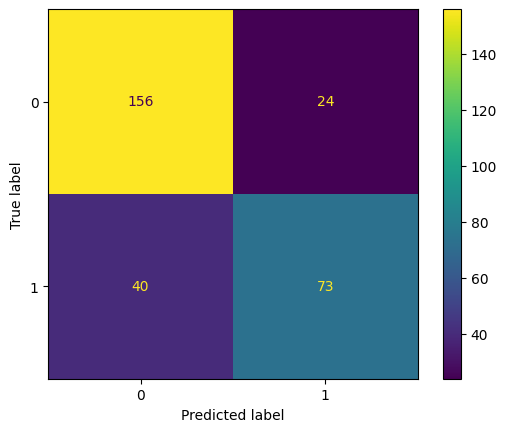

In [6]:
# Keveredési mátrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc)
disp.plot()

**Block2.2** Próbáljunk különféle paraméterbeállításokat és értékeljük ki az eredményt!

In [7]:
clf_rfc2 = RandomForestClassifier(random_state=0,
                                  n_estimators=200,
                                  max_depth=2,
                                  criterion='entropy',
                                  min_samples_leaf=15)
clf_rfc2 = clf_rfc2.fit(X_train, y_train.ravel())
clf_rfc2.score(X_test,y_test)

0.7815699658703071

**Block 2.3** Komlex paraméterekkel egy jónak tűnő megoldás:

0.8122866894197952


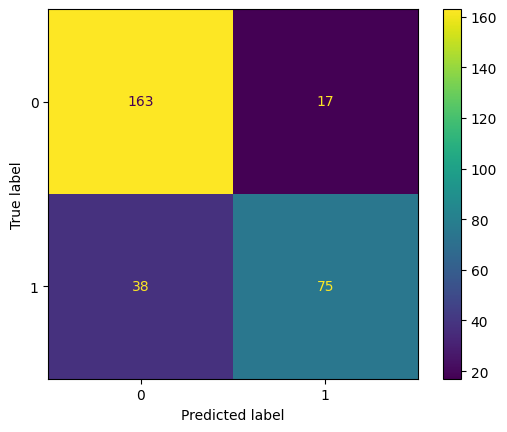

In [8]:
clf_rfc9 = RandomForestClassifier(n_estimators=40, random_state=0, criterion="entropy",  max_depth=5)
clf_rfc9 = clf_rfc9.fit(X_train, y_train.ravel())
print(clf_rfc9.score(X_test,y_test))

y_pred_rfc9 = clf_rfc9.predict(X_test)
cm_rfc9 = confusion_matrix(y_test, y_pred_rfc9)

cm_rfc9 = confusion_matrix(y_test, y_pred_rfc9)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc9)
disp.plot()

## **3. Boosting**

### **3.1 AdaBoost**

Az AdaBoost osztályozót a **[AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)** osztály segítségével valósíthatjuk meg.

*Fontosabb paraméterek:*

- *estimator*: az alap modell típusa (default: *DecisionTeeClassifier* *max_depth*=1 értékkel)
- *n_estimators*: a gyenge osztályozók maximális száma (deafult értéke 50) - tökéletes illeszkedés esetén előbb a tanulási folyamat előbb is leállhat
- *learning_rate*: A magasabb tanulási ráta növeli az egyes osztályozók hozzájárulását. A *learning_rate* és az *n_estimators* paraméterek között kompromisszumot kell kötni.


**Block 3.1** Az AdaBoost osztályozó létrehozása, a modell illesztése és az osztályozó kiértékelése:

In [9]:
# Modell létrehozása és illesztése

clf_ada = AdaBoostClassifier(n_estimators=50, learning_rate=1)
clf_ada = clf_ada.fit(X_train, y_train.ravel())

In [10]:
# Osztálycímke "jóslása"
y_pred_ada = clf_ada.predict(X_test)
print(y_pred_ada)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0]


In [11]:
# Modell kiértékelése
print("A modell pontossága:", clf_ada.score(X_test,y_test))

A modell pontossága: 0.7986348122866894


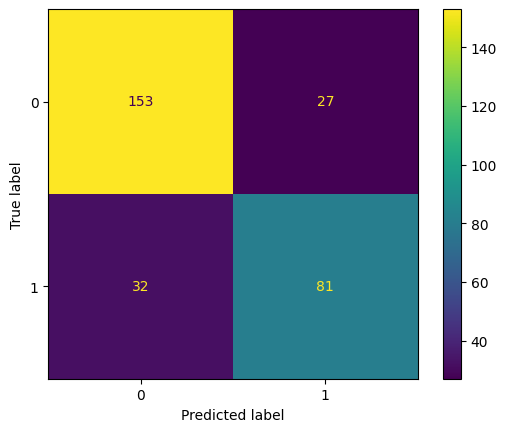

In [12]:
# Keveredési mátrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ada)
disp.plot()

**Block 3.2** Az AdaBoost osztályozó létrehozása SVC alapmodellekkel:

In [13]:
from sklearn.svm import SVC

#az alapmodell létrehozása
clf_svc=SVC(probability=True, kernel='linear')

# AdaBoost osztályozó SVC alapmodellekkel
clf_ada2 =AdaBoostClassifier(n_estimators=50, estimator=clf_svc,learning_rate=1)

# Train Adaboost Classifer
clf_ada2 = clf_ada2.fit(X_train, y_train.ravel())

#Predict the response for test dataset
y_pred_ada2 = clf_ada2.predict(X_test)

# Modell kiértékelése
print("A modell pontossága:", clf_ada2.score(X_test,y_test))

A modell pontossága: 0.7337883959044369


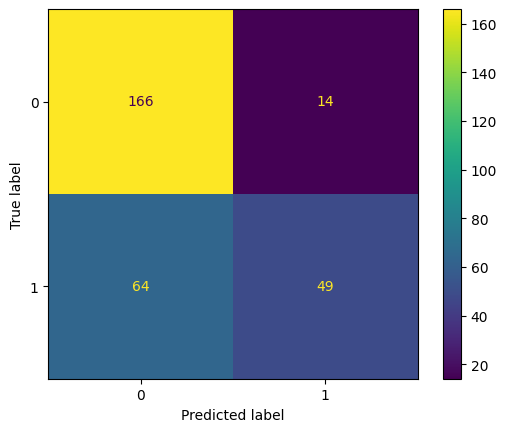

In [14]:
# Keveredési mátrix
cm_ada2 = confusion_matrix(y_test, y_pred_ada2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ada2)
disp.plot()

### **3.2 Gradient Boosting**

A Gradient Boosting osztályozót a **[GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)** osztály segítségével valósíthatjuk meg.

*Fontosabb paraméterek:*

- *loss*: a veszteségfüggvéyn, amit minimalizál (osztályozásnál *'log_loss'*)
- *n_estimators*: a gyenge osztályozók maximális száma (deafult értéke 100) - tökéletes illeszkedés esetén előbb a tanulási folyamat előbb is leállhat
- *learning_rate*: A magasabb tanulási ráta növeli az egyes osztályozók hozzájárulását. A *learning_rate* és az *n_estimators* paraméterek között kompromisszumot kell kötni.
- számos egyéb paraméter, ami a döntési fák-ra vonatkozik...


**Block 3.3** A Gradient Boosting osztályozó létrehozása, a modell illesztése és az osztályozó kiértékelése:

In [15]:
# Modell létrehozása és illesztése
clf_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf_gbc = clf_gbc.fit(X_train, y_train.ravel())

# Osztálycímke "jóslása"
y_pred_gbc = clf_gbc.predict(X_test)

# Modell kiértékelése
print("A modell pontossága:", clf_gbc.score(X_test,y_test))

A modell pontossága: 0.8088737201365188


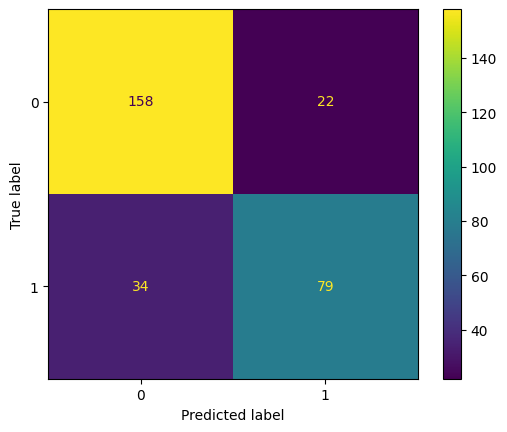

In [16]:
# Keveredési mátrix
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gbc)
disp.plot()

### **3.3 XGBoost**

A scikit learn jelen verziójában nem tartalmazza az XGBoost algoritmust. [Ebben a csomagban](https://xgboost.readthedocs.io/en/stable/python/python_intro.html) azonban implmentálták a módszert.

Az XGBoost **paramétereiről** részletes leírást találunk [ebben a cikkben](https://towardsdatascience.com/10-confusing-xgboost-hyperparameters-and-how-to-tune-them-like-a-pro-in-2023-e305057f546).

**Block 3.4** Az XGBoost használatához először egy külső csomagot kell telepítenünk:

In [17]:
!pip install xgboost

**Block 3.5** Az XGBoost osztályozó létrehozása, a modell illesztése és az osztályozó kiértékelése:

In [18]:
# Modell létrehozása és illesztése
from xgboost import XGBClassifier

clf_xgb = XGBClassifier()
clf_xgb = clf_xgb.fit(X_train, y_train)

# Osztálycímke "jóslása"
y_pred_xgb = clf_xgb.predict(X_test)

# Modell kiértékelése
print("A modell pontossága:", clf_xgb.score(X_test,y_test))

A modell pontossága: 0.7918088737201365


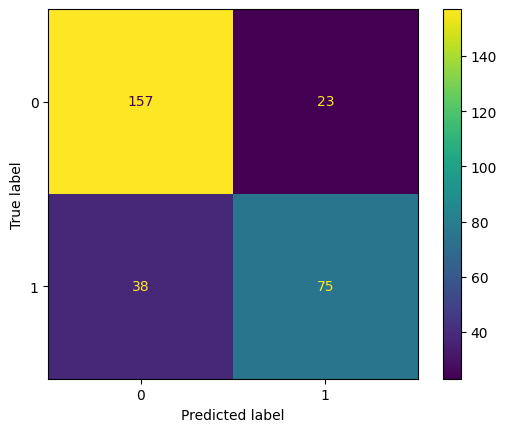

In [19]:
# Keveredési mátrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp.plot()

### **3.4 Light GBM**

**Block 3.6** A Light GBM használatához először egy külső csomagot kell telepítenünk:

In [20]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.3 MB/s  0:00:00


**Block 3.7** A LightGBM osztályozó létrehozása, a modell illesztése és az osztályozó kiértékelése:

In [21]:
# Modell létrehozása és illesztése
import lightgbm as lgb

clf_lgb = lgb.LGBMClassifier(boosting ='dart', learning_rate=0.05, min_data_in_leaf=20, feature_fraction=0.7, num_leaves=41,
                             metric='binary_logloss', drop_rate=0.15, verbose=-100)
clf_lgb = clf_lgb.fit(X_train, y_train.ravel())

# Osztálycímke "jóslása"
y_pred_lgb = clf_lgb.predict(X_test)

# Modell kiértékelése
print("A modell pontossága:", clf_lgb.score(X_test,y_test))

A modell pontossága: 0.8088737201365188


/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


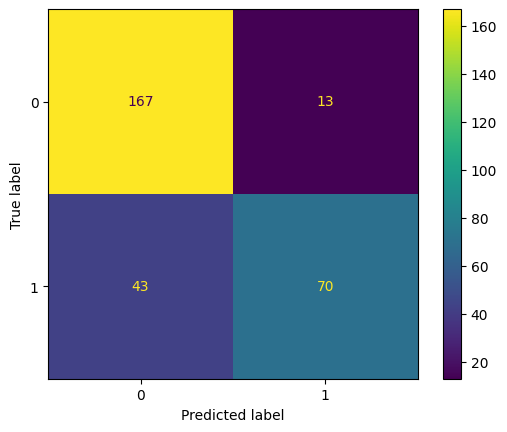

In [22]:
# Keveredési mátrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgb)
disp.plot()